<a href="https://colab.research.google.com/github/SanyaShresta25/Breast-Cancer-Prognostic-Prediction/blob/main/BreastCancerSRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tensorflow keras matplotlib numpy pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
df=pd.read_csv('/content/breast_cancer.csv')

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
del df['Unnamed: 32']

In [8]:
X=df.drop(['id','diagnosis'],axis=1)
y=df['diagnosis']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFeatureEngineering(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X


#  columns are numeric and categorical
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# numeric and categorical pipelines
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


feature_engineering_pipeline = Pipeline(steps=[
    ('custom_engineering', CustomFeatureEngineering())
])

# Combine
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'
)


full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_engineering', feature_engineering_pipeline)
])


X_train_processed = full_pipeline.fit_transform(X_train)
X_test_processed = full_pipeline.transform(X_test)

#y_train,y_test data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [12]:
pip install -q -U keras-tuner

In [11]:
# TensorFlow and Keras imports
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

# Keras Tuner imports
!pip install keras-tuner --upgrade  # Install Keras Tuner (run this once at the top)
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [13]:
def build_model(hp):

    model = keras.Sequential()
    # Add variable number of layers
    for i in range(hp.Int('num_layers', min_value=1, max_value=5)):
        model.add(layers.Dense(units=hp.Int(f'layer_{i}_units', min_value=32, max_value=512, step=32),
                               activation=hp.Choice(f'layer_{i}_activation', values=['relu', 'tanh', 'sigmoid',]),
                               kernel_initializer=hp.Choice(f'layer_{i}_kernel_initializer', values=['glorot_uniform', 'he_normal', 'lecun_normal']),
                               kernel_regularizer=hp.Choice(f'layer_{i}_kernel_regularizer', values=['l1', 'l2'])))

    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.get(hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])),
                  loss=hp.Choice('loss', values=['binary_crossentropy']),
                  metrics=['accuracy'])

    return model

In [15]:
tuner = RandomSearch(build_model,
                     objective='val_loss',
                     max_trials=5,
                     directory='my_tuner_directory',
                     project_name='my_tuner_project')

In [16]:
tuner.search(X_train_processed, y_train_encoded, epochs=50, validation_data=(X_test_processed, y_test_encoded))

Trial 5 Complete [00h 00m 13s]
val_loss: 0.9434884190559387

Best val_loss So Far: 0.22462686896324158
Total elapsed time: 00h 00m 58s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'layer_0_units': 512,
 'layer_0_activation': 'relu',
 'layer_0_kernel_initializer': 'lecun_normal',
 'layer_0_kernel_regularizer': 'l2',
 'dropout_rate': 0.2,
 'optimizer': 'adam',
 'loss': 'binary_crossentropy',
 'layer_1_units': 448,
 'layer_1_activation': 'tanh',
 'layer_1_kernel_initializer': 'glorot_uniform',
 'layer_1_kernel_regularizer': 'l1',
 'layer_2_units': 384,
 'layer_2_activation': 'relu',
 'layer_2_kernel_initializer': 'lecun_normal',
 'layer_2_kernel_regularizer': 'l1'}

In [17]:
model=tuner.get_best_models(num_models=1)[0]
callback=EarlyStopping(verbose=1,patience=1)
history=model.fit(X_train_processed,y_train_encoded,epochs=100,validation_data=(X_test_processed,y_test_encoded),callbacks=callback)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9843 - loss: 0.2628 - val_accuracy: 0.9912 - val_loss: 0.2636
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9824 - loss: 0.2492 - val_accuracy: 0.9912 - val_loss: 0.1884
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9830 - loss: 0.2127 - val_accuracy: 0.9912 - val_loss: 0.2560
Epoch 3: early stopping


In [18]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [19]:
# Display model summary
model.summary()

# Evaluate the model once (no repetition!)
results = model.evaluate(X_test_processed, y_test_encoded, verbose=0)

# Get the list of all metric names
metrics_names = model.metrics_names

# Print all metrics
for name, value in zip(metrics_names, results):
    print(f"{name}: {value}")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 224)                 │           6,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           7,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,468 (119.02 KB)

 Trainable params: 15,233 (59.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,235 (59.52 KB)

loss: 0.2559799253940582
compile_metrics: 0.9912280440330505


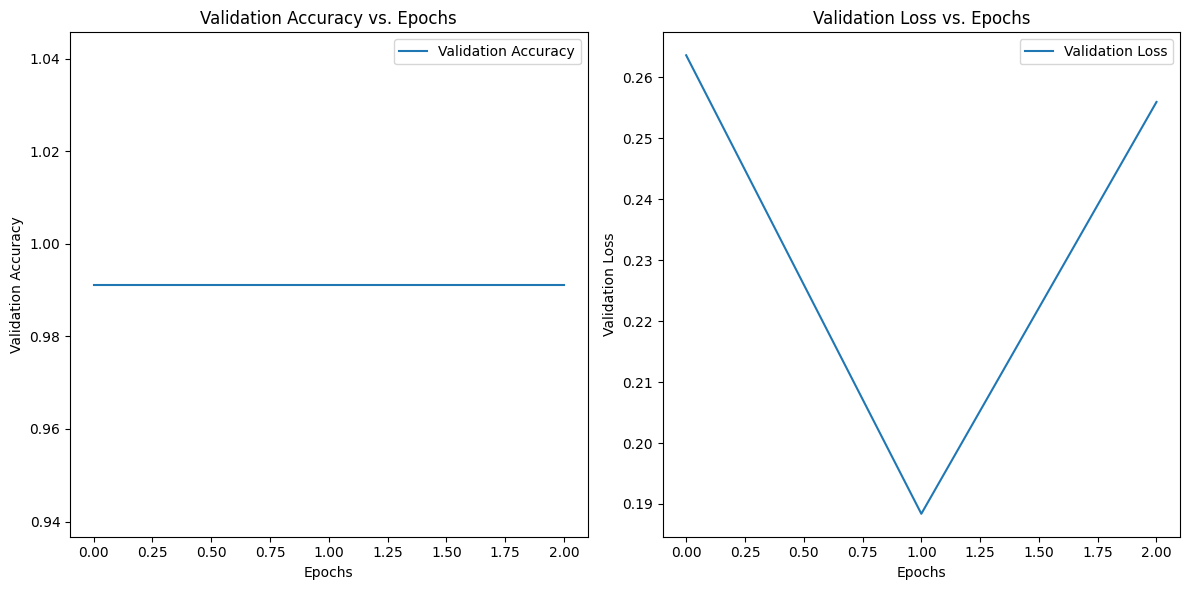

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

# Plot validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


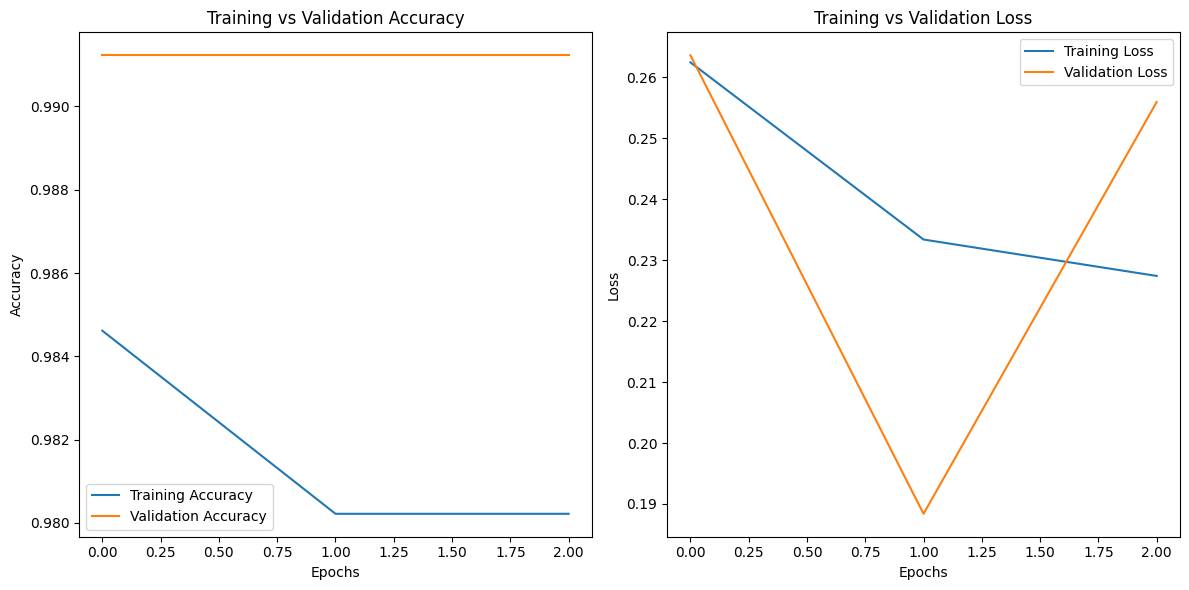

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()